In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AverageLearning import *

In [3]:
import scipy.io
file_name = ['Cube', 'Cube_faulty', 'Cube_out', 'Cube_out_faulty']
ls = []
for file in file_name:
    mat = scipy.io.loadmat('./data/' + file + '.mat')
    ls.append(mat[file])
input_data = dict(zip(file_name, ls))

In [9]:
train_data = np.zeros((2, input_data['Cube'].shape[1]))
test_data = np.zeros((2, input_data['Cube_faulty'].shape[1]))

In [10]:
test_data[0] = (input_data['Cube_faulty'][0] + input_data['Cube_faulty'][1] + input_data['Cube_faulty'][2] + input_data['Cube_faulty'][6]) / 4
train_data[0] = (input_data['Cube'][0] + input_data['Cube'][1] + input_data['Cube'][2] + input_data['Cube'][6]) / 4

In [11]:
test_data[0] = (input_data['Cube_faulty'][3] + input_data['Cube_faulty'][4] + input_data['Cube_faulty'][5]) / 3
train_data[1] = (input_data['Cube'][3] + input_data['Cube'][4] + input_data['Cube'][5]) / 3

In [12]:
test_data[0] = input_data['Cube_faulty'][0]
test_data[1] = input_data['Cube_faulty'][3]

In [13]:
INPUT_DIM, NUM_SAMPLES = train_data.shape
NUM_CUBES, NUM_SEG = Compute_Cubes(NUM_SAMPLES, INPUT_DIM)
print('Set up...')
print(' INPUT_DIM', INPUT_DIM)
print(' NUM_SEG', NUM_SEG)
print(' NUM_CUBES', NUM_CUBES)
print(' NUM_SAMPLES', NUM_SAMPLES)

Set up...
 INPUT_DIM 2
 NUM_SEG 8
 NUM_CUBES 64
 NUM_SAMPLES 400000


In [14]:
model = AveragingMethod(INPUT_DIM, NUM_SEG)
model.Train(train_data, input_data['Cube_out'].flatten())

In [15]:
values_test = model.Inference(test_data)

In [16]:
values = model.Inference(train_data)

In [17]:
thre_train = 3.8 * np.ones(train_data.shape[1])

In [18]:
error_train = input_data['Cube_out'].flatten() - values

In [19]:
SPE_train = (error_train * error_train)

In [20]:
train_values = input_data['Cube_out'].flatten()

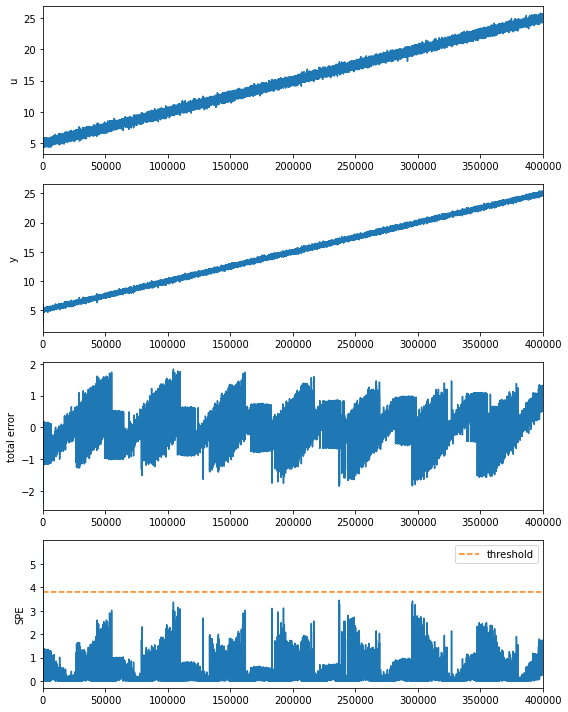

In [21]:
plt.figure(figsize=(8, 10))
plt.subplot(4, 1, 1)
plt.plot(train_data[0])
plt.xlim([0, train_data.shape[1]])
plt.ylabel("u")
plt.subplot(4, 1, 2)
plt.plot(train_values)
plt.xlim([0, train_data.shape[1]])
plt.ylabel("y")
plt.subplot(4, 1, 3)
plt.plot(error_train)
plt.xlim([0, train_data.shape[1]])
plt.ylabel("total error")
plt.subplot(4, 1, 4)
plt.plot(SPE_train)
plt.xlim([0, train_data.shape[1]])
plt.ylabel("SPE")
plt.plot(thre_train, '--', label='threshold')
plt.legend()
plt.savefig("./figures/close.png")
plt.tight_layout()

In [25]:
values_test = model.Inference(test_data)

In [26]:
error = input_data['Cube_out_faulty'].flatten() - values_test

In [27]:
SPE = (error * error)
thre = 3.8 * np.ones(test_data.shape[1])

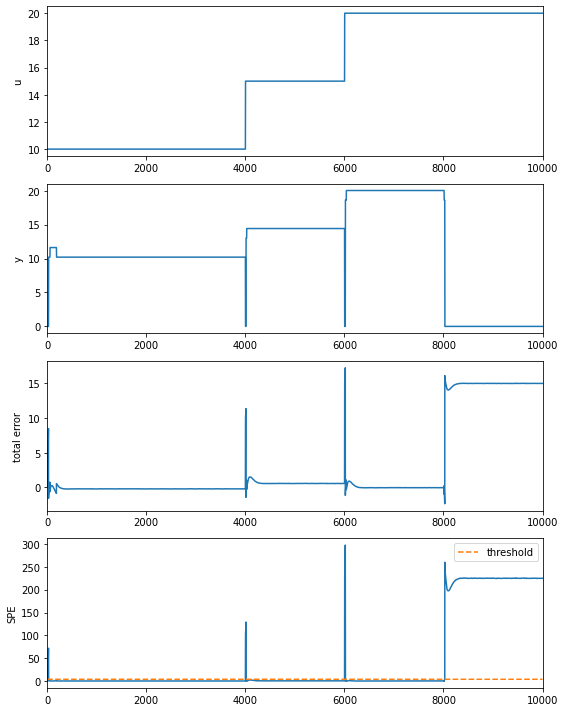

In [28]:
plt.figure(figsize=(8, 10))
plt.subplot(4, 1, 1)
plt.plot(test_data[0])
plt.xlim([0, test_data.shape[1]])
# plt.axis([0, train_data.shape[1],])
plt.ylabel("u")
plt.subplot(4, 1, 2)
plt.plot(values_test)
plt.xlim([0, test_data.shape[1]])
plt.ylabel("y")
plt.subplot(4, 1, 3)
plt.plot(error)
plt.xlim([0, test_data.shape[1]])
plt.ylabel("total error")
plt.subplot(4, 1, 4)
plt.plot(SPE)
plt.xlim([0, test_data.shape[1]])
plt.ylabel("SPE")
plt.plot(thre, '--', label='threshold')
plt.legend()
plt.savefig("./figures/open.png")
plt.tight_layout()